In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
import joblib
from scikeras.wrappers import KerasClassifier

# Load the dataset
data = pd.read_csv('app/data/diabetes_datasett.csv')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

def create_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier
model_cv = KerasClassifier(model=create_model, epochs=200, batch_size=32, verbose=0)

# Evaluate with cross-validation
scores = cross_val_score(model_cv, X_train, y_train, cv=5, scoring=make_scorer(accuracy_score))
print(f'Cross-validation accuracy: {scores.mean()}')

# Save the model
model.save('diabetes_model2.h5')

# Save the scaler
joblib.dump(scaler, 'scaler2.pkl')


C:\Users\DELL\AppData\Local\Temp\ipykernel_11724\3072579621.py:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])
c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6029 - loss: 0.6751 - val_accuracy: 0.6585 - val_loss: 0.6311
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7196 - loss: 0.5841 - val_accuracy: 0.6829 - val_loss: 0.5734
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7344 - loss: 0.5294 - val_accuracy: 0.7317 - val_loss: 0.5216
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7487 - loss: 0.5021 - val_accuracy: 0.7480 - val_loss: 0.4952
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7592 - loss: 0.5083 - val_accuracy: 0.7480 - val_loss: 0.4833
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7701 - loss: 0.4675 - val_accuracy: 0.7317 - val_loss: 0.4759
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8151 - loss: 0.4299 - val_accuracy: 0.7236 - val_loss: 0.4725
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7674 - loss: 0.4392 - val_accuracy: 0.7480 - 

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-validation accuracy: 0.7313074770091963


['scaler2.pkl']

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('app/data/diabetes_datasett.csv')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])


C:\Users\DELL\AppData\Local\Temp\ipykernel_11724\622381093.py:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])


In [7]:
# 1. Importing and Exploring Data

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Basic info
print(data.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244

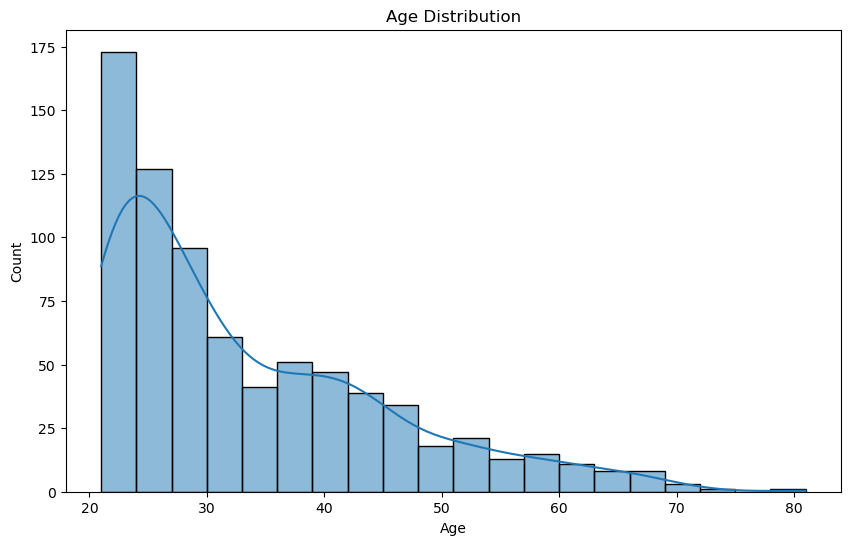

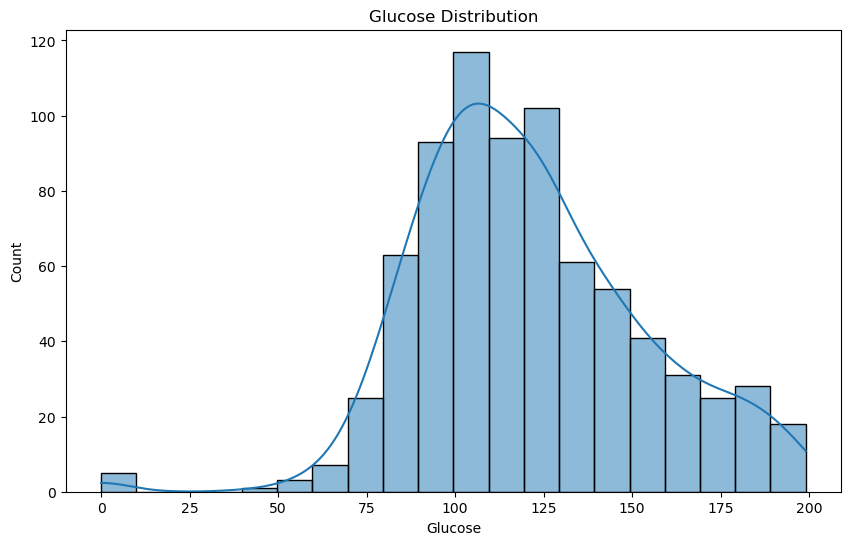

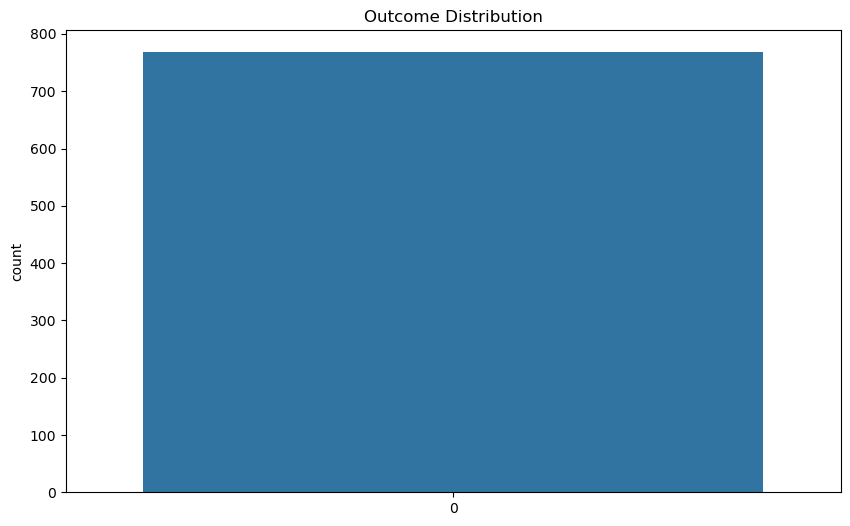

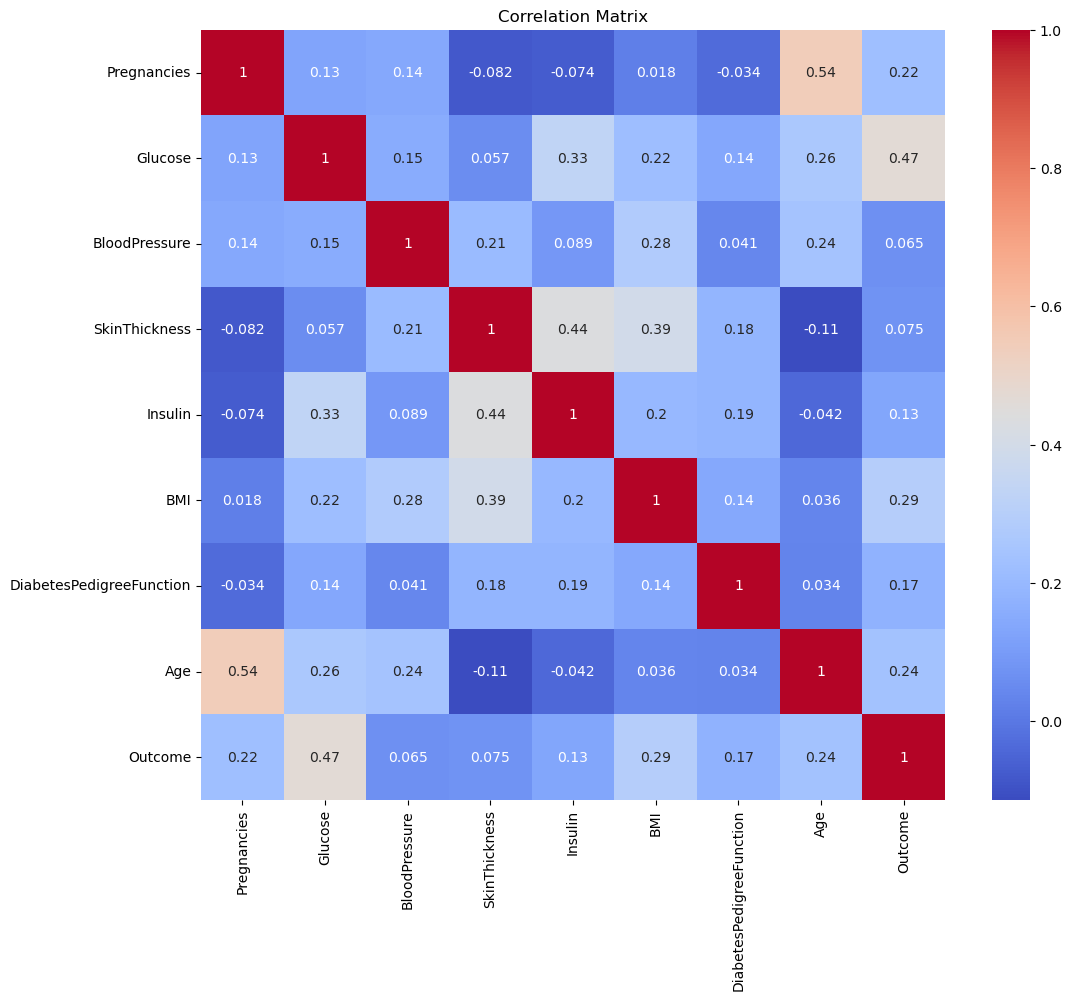

In [8]:
# 2. Data Analysis and Pattern Discovery

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Glucose distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Glucose'], bins=20, kde=True)
plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

# Outcome distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['Outcome'])
plt.title('Outcome Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


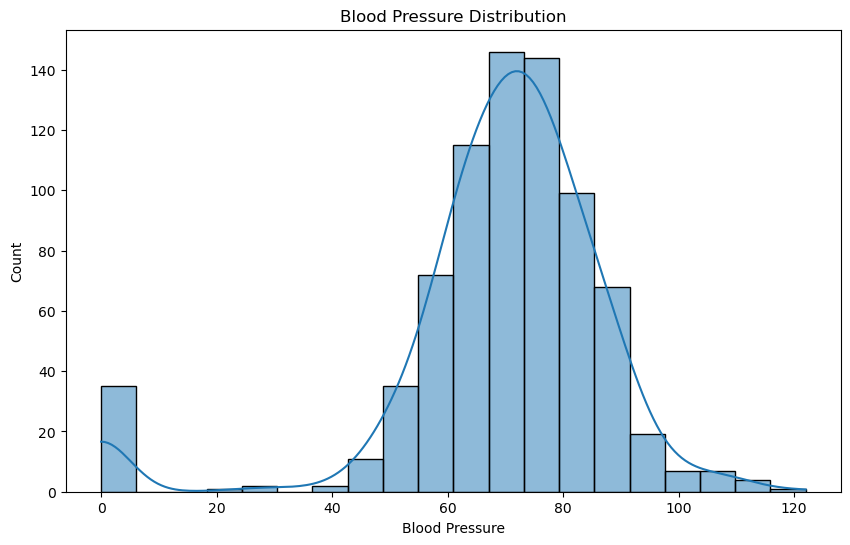

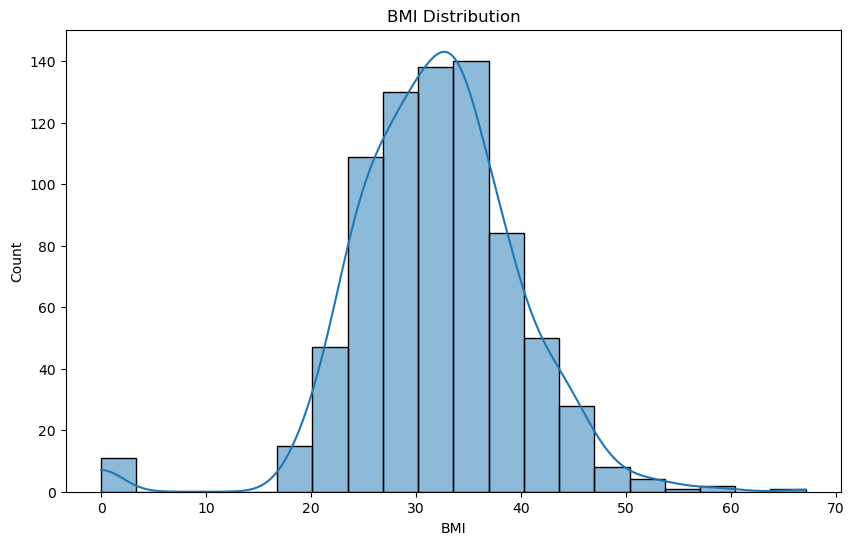

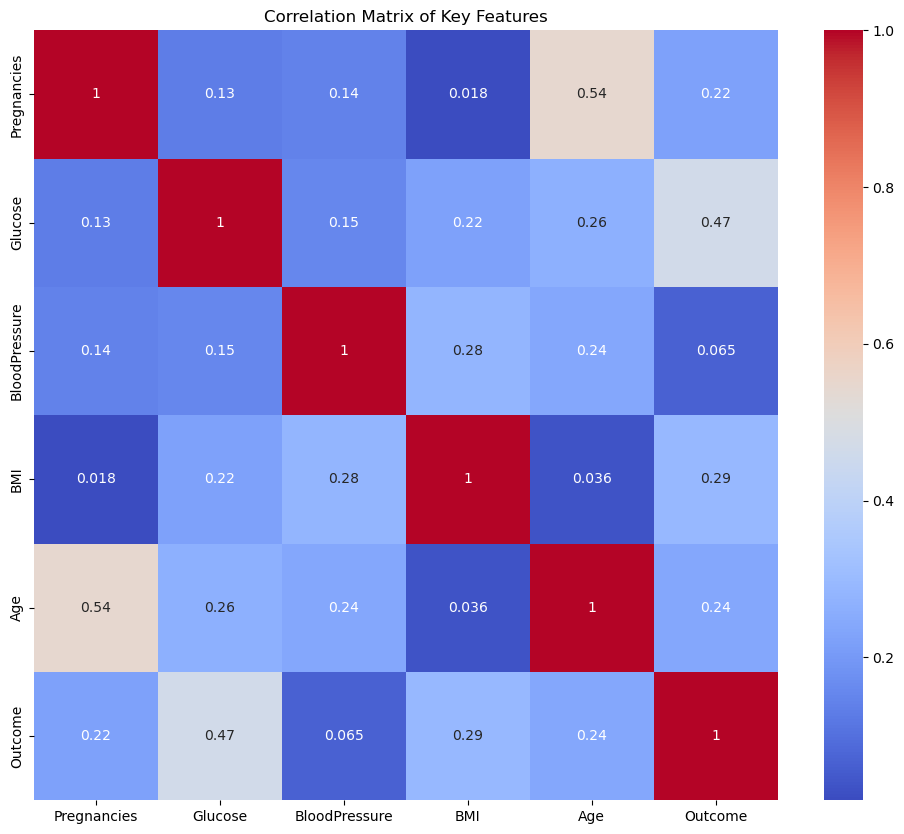

In [9]:
# 3. More Detailed Data Analysis

# Distribution of BloodPressure
plt.figure(figsize=(10, 6))
sns.histplot(data['BloodPressure'], bins=20, kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Heatmap of correlations focusing on key features
plt.figure(figsize=(12, 10))
sns.heatmap(data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Features')
plt.show()


In [ ]:
# 4. Bivariate Analysis

# Age vs Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=data)
plt.title('Age vs Outcome')
plt.show()

# Glucose vs Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose vs Outcome')
plt.show()

# BMI vs Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('BMI vs Outcome')
plt.show()

# Scatter plot of Glucose vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data)
plt.title('Glucose vs BMI')
plt.show()


In [ ]:
# 5. Multiple Plots

# Pairplot to see relationships between features
sns.pairplot(data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

# Violin plot of Age vs Outcome
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='Age', data=data)
plt.title('Age vs Outcome')
plt.show()

# Swarm plot of BMI vs Outcome
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Outcome', y='BMI', data=data)
plt.title('BMI vs Outcome')
plt.show()


In [ ]:
# 6. Time Series Analysis (if applicable)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming there's a Date column in the dataset
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Plotting the data over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='Glucose', hue='Outcome', data=data)
    plt.title('Glucose over Time')
    plt.show()
    
    # Plotting the data over time by Age
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='Age', hue='Outcome', data=data)
    plt.title('Age over Time by Outcome')
    plt.show()
    

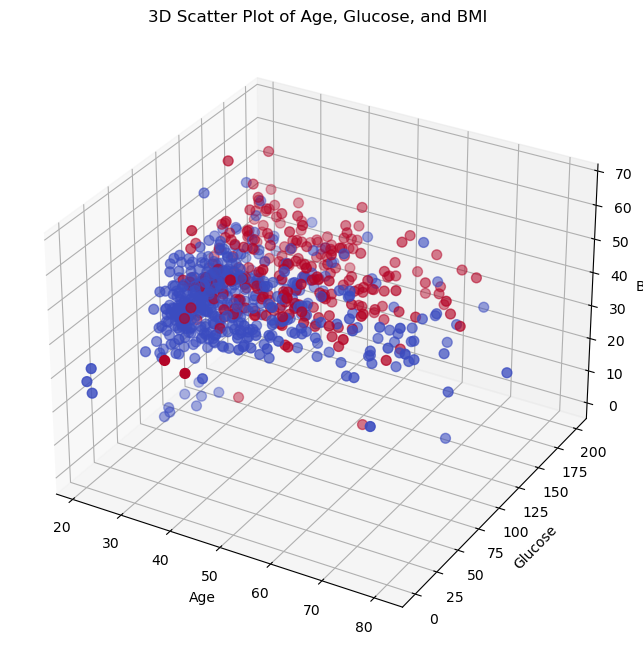

In [10]:
# 7. 3D Plots

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 3D scatter plot of Age, Glucose, and BMI
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Glucose'], data['BMI'], c=data['Outcome'], cmap='coolwarm', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Glucose')
ax.set_zlabel('BMI')
plt.title('3D Scatter Plot of Age, Glucose, and BMI')
plt.show()


In [11]:
%pip install scikeras

Note: you may need to restart the kernel to use updated packages.
